### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')
data.head() 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_data = data.isnull().sum()
print(missing_data[missing_data>0])

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# Replace missing values in 'car' column with 'Unknown'
data['car'].fillna('Unknown', inplace=True)

# Replace missing values in other columns with the mode
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)


In [10]:
# Check again for any remaining missing data
missing_data_after = data.isnull().sum()
print(missing_data_after[missing_data_after > 0])  # Should return an empty result


Series([], dtype: int64)


4. What proportion of the total observations chose to accept the coupon? 



In [11]:
coupon_acceptance_proportion = data['Y'].value_counts(normalize=True)
print(coupon_acceptance_proportion)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

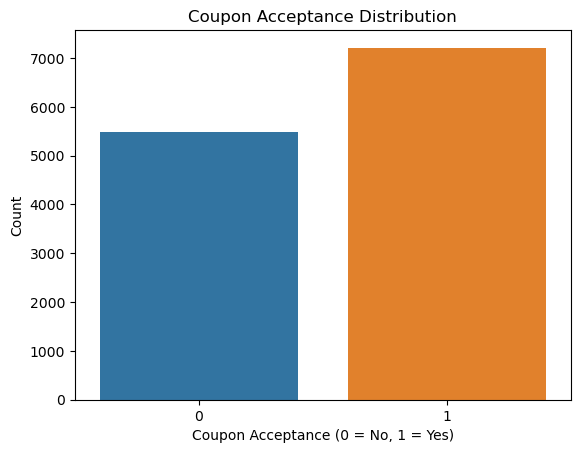

In [12]:
sns.countplot(x='Y', data=data)
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Acceptance (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

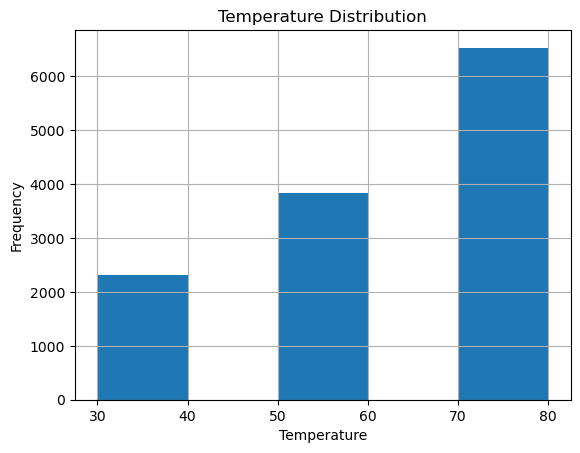

In [17]:
data['temperature'].hist(bins=5)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar_coupons=data[data['Bar'].notna()]
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [21]:
bar_coupon_acceptance_proportion = bar_coupons['Y'].value_counts(normalize=True)
print(bar_coupon_acceptance_proportion)


Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [31]:
# Check unique values after mapping
print(bar_coupons['Bar_cleaned'].unique())


[0.  0.5 2.  9.  6. ]


In [32]:
# Check unique values in the original 'Bar' column
print(bar_coupons['Bar'].unique())


['never' 'less1' '1~3' 'gt8' '4~8']


In [34]:
bar_coupons['Bar_cleaned'] = bar_coupons['Bar'].replace({
    'never': 0, 
    'less1': 0.5, 
    '1~3': 2, 
    '4~8': 6, 
    'gt8': 9 })

In [35]:
# Calculate the acceptance rate for both groups
bar_acceptance_rate_by_frequency = bar_coupons.groupby('Bar_Frequency')['Y'].value_counts(normalize=True).unstack()

# Display the acceptance rates
print(bar_acceptance_rate_by_frequency)


Y                     0         1
Bar_Frequency                    
0              0.438405  0.561595
1              0.377544  0.622456


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
# Check if the 'age' column exists and its unique values
print(bar_coupons.columns)  # List all columns
print(bar_coupons['age'].unique())  # Check unique values in the 'age' column


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'Bar_cleaned', 'Bar_Frequency'],
      dtype='object')
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [40]:
# Map the 'age' values to numeric equivalents
bar_coupons['age_cleaned'] = bar_coupons['age'].replace({
    'below21': 20, 
    '21': 21, 
    '26': 26, 
    '31': 31, 
    '36': 36, 
    '41': 41, 
    '46': 46, 
    '50plus': 55  # Arbitrary value for 50+ category
})

# Check the unique values after mapping
print(bar_coupons['age_cleaned'].unique())

[21 46 26 31 41 55 36 20]


In [41]:
# Create a binary column: 1 if they go to a bar more than once a month and are over 25
bar_coupons['Bar_and_Age'] = bar_coupons.apply(
    lambda row: 1 if row['Bar_cleaned'] > 1 and row['age_cleaned'] > 25 else 0, axis=1
)

# Check the first few rows to ensure it worked
print(bar_coupons[['Bar_cleaned', 'age_cleaned', 'Bar_and_Age']].head())


   Bar_cleaned  age_cleaned  Bar_and_Age
0          0.0           21            0
1          0.0           21            0
2          0.0           21            0
3          0.0           21            0
4          0.0           21            0


In [42]:
# Calculate the acceptance rate for both groups
bar_acceptance_by_age = bar_coupons.groupby('Bar_and_Age')['Y'].value_counts(normalize=True).unstack()
print(bar_acceptance_by_age)


Y                   0         1
Bar_and_Age                    
0            0.446452  0.553548
1            0.378466  0.621534


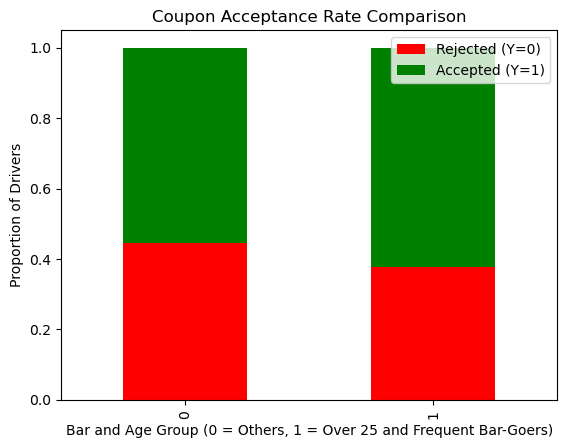

In [44]:
acceptance_rates = bar_coupons.groupby('Bar_and_Age')['Y'].value_counts(normalize=True).unstack()
acceptance_rates.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Coupon Acceptance Rate Comparison')
plt.xlabel('Bar and Age Group (0 = Others, 1 = Over 25 and Frequent Bar-Goers)')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], loc='best')
plt.show()

Drivers who go to bars more than once a month and are over 25:
37.85% rejected the coupon (Y = 0).
62.15% accepted the coupon (Y = 1).

All other drivers (either go to bars less frequently or are 25 or younger):
44.65% rejected the coupon (Y = 0).
55.35% accepted the coupon (Y = 1).

Drivers who go to bars more than once a month and are over 25 years old are more likely to accept a bar-related coupon compared to other drivers.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [46]:
# Create a binary column: 1 if they meet all conditions, 0 otherwise
bar_coupons['Bar_Passanger_Occupation'] = bar_coupons.apply(
    lambda row: 1 if (row['Bar_cleaned'] > 1 and 
                      row['passanger'] != 'Kid' and 
                      row['occupation'] not in ['Farming', 'Fishing', 'Forestry']) 
    else 0, axis=1)

print(bar_coupons[['Bar_cleaned', 'passanger', 'occupation', 'Bar_Passanger_Occupation']].head())


   Bar_cleaned  passanger  occupation  Bar_Passanger_Occupation
0          0.0      Alone  Unemployed                         0
1          0.0  Friend(s)  Unemployed                         0
2          0.0  Friend(s)  Unemployed                         0
3          0.0  Friend(s)  Unemployed                         0
4          0.0  Friend(s)  Unemployed                         0


In [47]:
###### Calculate the Acceptance Rate for Both Groups

In [49]:
acceptance_rate_by_passanger_occupation = bar_coupons.groupby('Bar_Passanger_Occupation')['Y'].value_counts(normalize=True).unstack()
print(acceptance_rate_by_passanger_occupation)

Y                                0         1
Bar_Passanger_Occupation                    
0                         0.455384  0.544616
1                         0.377886  0.622114


In [50]:
###### Visualization

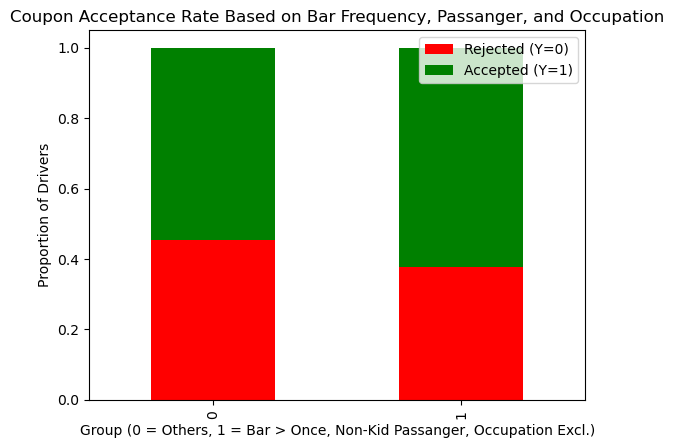

In [53]:
acceptance_rate_by_passanger_occupation.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Coupon Acceptance Rate Based on Bar Frequency, Passanger, and Occupation')
plt.xlabel('Group (0 = Others, 1 = Bar > Once, Non-Kid Passanger, Occupation Excl.)')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], loc='best')

plt.show()

Group 1 (Bar_Passenger_Occupation = 1): Drivers who go to bars more than once a month, have passengers that are not kids, and have occupations outside farming, fishing, or forestry.

Group 2 (Bar_Passenger_Occupation = 0): All other drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [58]:
bar_coupons['RestaurantLessThan20_cleaned'] = bar_coupons['RestaurantLessThan20'].replace({
    'never': 0,       # Never visited cheap restaurants
    'less1': 0.5,     # Less than 1 time per month
    '1~3': 2,         # 1 to 3 times per month, average value 2
    '4~8': 6,         # 4 to 8 times per month, average value 6
    'gt8': 9})        # Greater than 8 times per month

print(bar_coupons['RestaurantLessThan20_cleaned'].unique())

[6.  2.  0.5 9.  0. ]


In [59]:
bar_coupons['income_cleaned'] = bar_coupons['income'].replace({
    'Less than $12500': 12500,        # Approximate numeric value for "Less than $12500"
    '$12500 - $24999': 25000,         # Average value of the range
    '$25000 - $37499': 37500,         # Average value of the range
    '$37500 - $49999': 50000,         # Average value of the range
    '$50000 - $62499': 62500,         # Average value of the range
    '$62500 - $74999': 75000,         # Average value of the range
    '$75000 - $87499': 87500,         # Average value of the range
    '$87500 - $99999': 100000,        # Average value of the range
    '$100000 or More': 100000})        # Assume maximum for the highest range

print(bar_coupons['income_cleaned'].unique())

[ 50000  75000  25000  87500  62500  37500 100000  12500]


In [60]:
# Condition 1: Go to bars > once a month, non-kid passengers, and not widowed
condition_1 = (bar_coupons['Bar_cleaned'] > 1) & (bar_coupons['passanger'] != 'Kid') & (bar_coupons['maritalStatus'] != 'Widowed')

# Condition 2: Go to bars > once a month and are under 30 years old
condition_2 = (bar_coupons['Bar_cleaned'] > 1) & (bar_coupons['age_cleaned'] < 30)

# Condition 3: Go to cheap restaurants > 4 times a month and income < 50K
condition_3 = (bar_coupons['RestaurantLessThan20_cleaned'] > 4) & (bar_coupons['income_cleaned'] < 50000)

# Combine conditions using OR
combined_conditions = condition_1 | condition_2 | condition_3


In [61]:
# Create the 'Meets_Conditions' column: 1 if any condition is met, 0 otherwise
bar_coupons['Meets_Conditions'] = combined_conditions.astype(int)

# Calculate the acceptance rate for both groups
acceptance_rate_by_conditions = bar_coupons.groupby('Meets_Conditions')['Y'].value_counts(normalize=True).unstack()
print(acceptance_rate_by_conditions)

Y                        0         1
Meets_Conditions                    
0                 0.455258  0.544742
1                 0.394007  0.605993


Drivers who meet any of the conditions (Group 1) are more likely to accept the coupon than those who do not meet any of the conditions (Group 2). 
Acceptance rate for Group 1: 60.60%
Acceptance rate for Group 2: 54.47%
Rejection rate is also lower for Group 1 (39.40%) compared to Group 2 (45.53%).
Drivers who meet any of the conditions (frequent bar-goers, under 30 years old, or regular visitors of cheap restaurants with lower incomes) are more likely to accept the coupon.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

 Drivers who are younger, frequent social establishments like bars, and are more budget-conscious are more likely to accept bar coupons. Social context (e.g., having adult passengers) and frequenting affordable dining options also contribute to higher acceptance rates.
These drivers may view bar coupons as a valuable way to save money on activities they already enjoy, and their acceptance is influenced by both personal habits (frequenting bars) and social circumstances (being with other adults).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### CoffeeHouse Coupons

Subset the data for drivers who received a coffe house coupon

In [65]:
coffee_coupons = bar_coupons[bar_coupons['CoffeeHouse'].notna()]
print(coffee_coupons.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   direction_opp  Y Bar_cleaned Bar_Frequency age_cleaned Bar_and_Age  \
0              1  1         0.0             0          21           0   
1              1  0         0.0           

Age and Coupon acceptance

In [66]:
age_acceptance = coffee_coupons.groupby('age_cleaned')['Y'].value_counts(normalize=True).unstack()
print(age_acceptance)

Y                   0         1
age_cleaned                    
20           0.365631  0.634369
21           0.401809  0.598191
26           0.404064  0.595936
31           0.453654  0.546346
36           0.464746  0.535254
41           0.427264  0.572736
46           0.424198  0.575802
55           0.491051  0.508949


Income and Coupon Acceptance

In [70]:
income_acceptance = coffee_coupons.groupby('income_cleaned')['Y'].value_counts(normalize=True).unstack()
print(income_acceptance)

Y                      0         1
income_cleaned                    
12500           0.406910  0.593090
25000           0.425451  0.574549
37500           0.406855  0.593145
50000           0.436011  0.563989
62500           0.404461  0.595539
75000           0.472813  0.527187
87500           0.516919  0.483081
100000          0.437476  0.562524


Passenger type and coupon acceptance

In [69]:
passanger_acceptance = coffee_coupons.groupby('passanger')['Y'].value_counts(normalize=True).unstack()
print(passanger_acceptance)

Y                 0         1
passanger                    
Alone      0.474196  0.525804
Friend(s)  0.326562  0.673438
Kid(s)     0.495030  0.504970
Partner    0.404651  0.595349


Bar visits and coupon Acceptance: Let's see if drivers who visit bars often also accept coffe house coupons

In [71]:
bar_acceptance = coffee_coupons.groupby('Bar_cleaned')['Y'].value_counts(normalize=True).unstack()
print(bar_acceptance)

Y                   0         1
Bar_cleaned                    
0.0          0.467949  0.532051
0.5          0.436244  0.563756
2.0          0.378083  0.621917
6.0          0.362454  0.637546
9.0          0.424069  0.575931


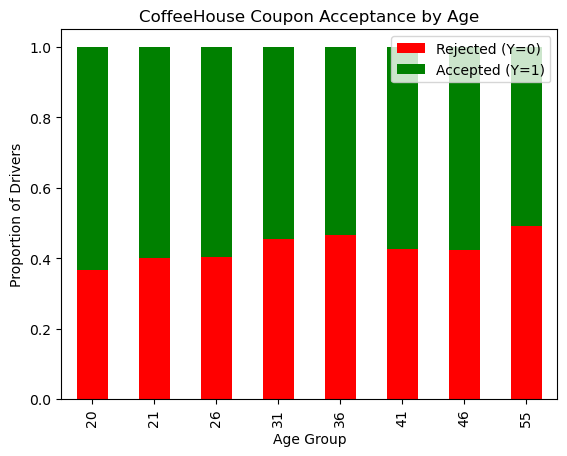

In [72]:
import matplotlib.pyplot as plt

# Plot coupon acceptance by age group
age_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('CoffeeHouse Coupon Acceptance by Age')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'])
plt.show()


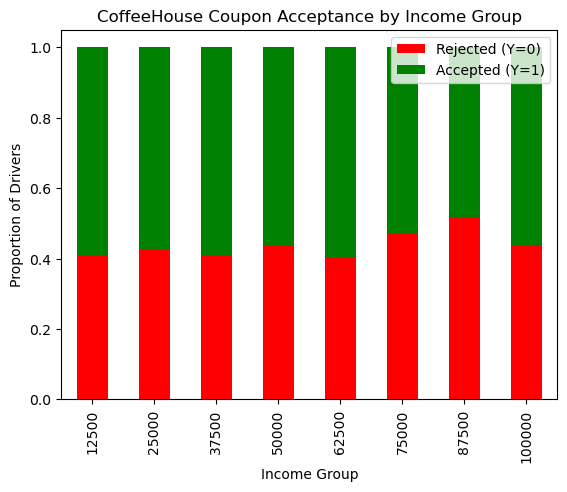

In [74]:
income_acceptance = coffee_coupons.groupby('income_cleaned')['Y'].value_counts(normalize=True).unstack()

# Plot coupon acceptance by income group
income_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('CoffeeHouse Coupon Acceptance by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], loc='best')

plt.show()

Income plays a larger role than age in CoffeeHouse coupon acceptance. Drivers in lower-income groups ($12,500 - $50,000) are more likely to accept the coupon compared to drivers with higher incomes ($75,000 and above). This could suggest that lower-income individuals value smaller savings, such as coffee house discounts, more than higher-income individuals

##### Now let's calculate acceptance rates by educational level:

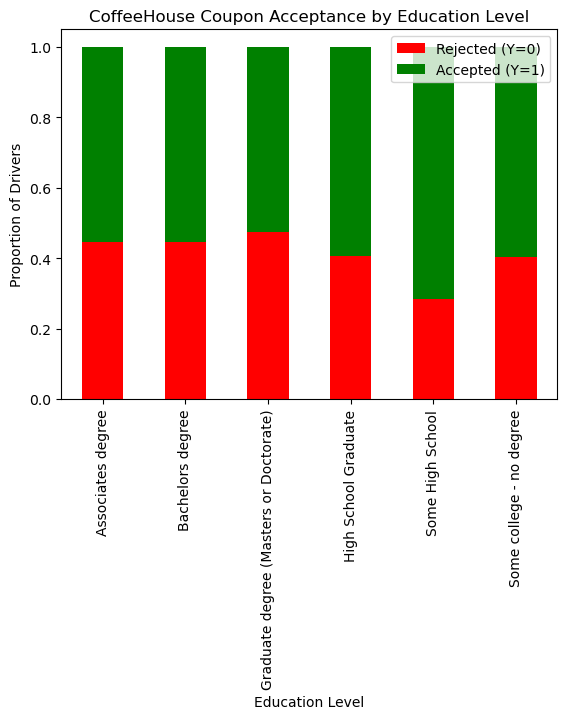

In [75]:
education_acceptance = coffee_coupons.groupby('education')['Y'].value_counts(normalize=True).unstack()
education_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('CoffeeHouse Coupon Acceptance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], loc='best')

plt.show()

In [76]:
#### What about 'Occupation'? let's see if certain fields are more likely to accept Coffehouse coupons

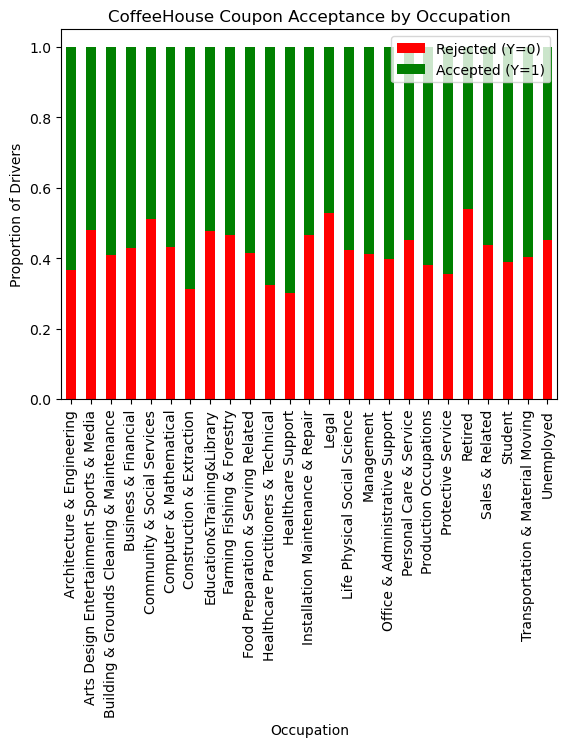

In [77]:
occupation_acceptance = coffee_coupons.groupby('occupation')['Y'].value_counts(normalize=True).unstack()
occupation_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('CoffeeHouse Coupon Acceptance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Drivers')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], loc='best')


plt.show()

Overall, it appears that high school, college and  service industry jobs and office-based roles are more likely to embrace coffee house coupons, possibly due to the frequency of coffee as a routine beverage during work hours.

Occupation plays a significant role in determining whether a driver is likely to accept a CoffeeHouse coupon. People in jobs where coffee is a common part of their workday (e.g., food service, office work) tend to accept coupons at a higher rate, while those in more physical, outdoor jobs (e.g., farming, maintenance) tend to reject these offers more often.

